## Source Code : https://gist.github.com/lopes/168c9d74b988391e702aac5f4aa69e41

## Reference Video :
[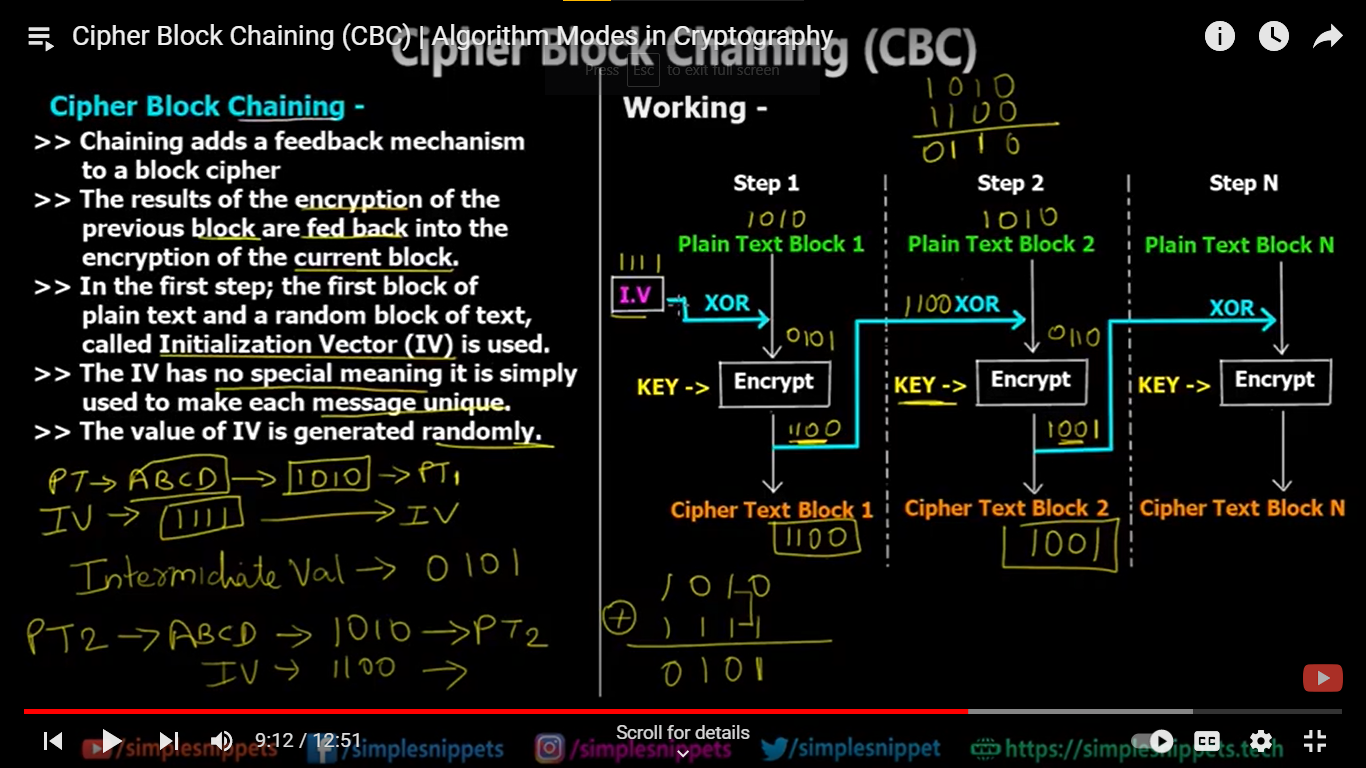](https://www.youtube.com/watch?v=NnLLkmgBhCY)

# Advanced Encryption Standard

    128-bit AES encryption refers to the process of concealing (hide) plaintext data using an AES key length of 128 bits.
    128-bit AES encryption uses 10 transformation rounds to convert plaintext into ciphertext and is approved by the 
    National Security Agency (NSA) to protect secret but not top-secret government information.
    
> There is no difference between AES with a 128-bit key and AES_128


# Cipher Block Chaining :-

- Chaining adds a feedback mechanism to a block cipher
- The results of the encryption of the previous block are fed back into the encryption of the current block.
- In the first step; the first block of plain text and a random block of text, called **Initialization Vector (IV)** is used.
- The IV has no special meaning it is simply used to make each message unique.
- The value of IV is generated randomly.


# PKCS5 padding

    Public-Key Cryptography Standards (PKCS) are a set of standard protocols, numbered from 1 to 15. 
    These standards were developed to enable secure information exchange on the internet by using 
    a public key infrastructure (PKI).

    PKCS5Padding is a padding scheme described in: RSA Laboratories, "PKCS #5: Password-Based Encryption Standard," version 1.5, November 1993. PKCS5Padding schema is actually very simple. It follows the following rules: The number of bytes to be padded equals to "8 - numberOfBytes(clearText) mod 8".

In [408]:

# AES128 encryption decryption with CBC mode and PKCS5 padding

# https://stackoverflow.com/a/13893208/11493297
# https://gist.github.com/lopes/168c9d74b988391e702aac5f4aa69e41
# https://www.youtube.com/watch?v=NnLLkmgBhCY

from hashlib import md5
from base64 import b64decode, b64encode

from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

class AESCipher:
    def __init__(self, key):
        self.key = md5(key.encode('utf8')).digest()

    def encrypt(self, data):
        iv = get_random_bytes(AES.block_size)
        self.cipher = AES.new(self.key, AES.MODE_CBC, iv)
        return b64encode(iv + self.cipher.encrypt(pad(data.encode('utf-8'), 
            AES.block_size)))

    def decrypt(self, data):
        raw = b64decode(data)
        self.cipher = AES.new(self.key, AES.MODE_CBC, raw[:AES.block_size])
        return unpad(self.cipher.decrypt(raw[AES.block_size:]), AES.block_size)


if __name__ == '__main__':
    print('TESTING ENCRYPTION')
    msg = input('Message...: ')
    pwd = input('Password..: ')
    print('Ciphertext:', AESCipher(pwd).encrypt(msg).decode('utf-8'))

    print('\nTESTING DECRYPTION')
    cte = input('Ciphertext: ')
    pwd = input('Password..: ')
    print('Message...:', AESCipher(pwd).decrypt(cte).decode('utf-8'))

TESTING ENCRYPTION
Message...: hello
Password..: hi
Ciphertext: X+/cVaR/doZSgbgzEyDMF3EAO04MMWZQ3eIm30WTmhE=

TESTING DECRYPTION
Ciphertext: X+/cVaR/doZSgbgzEyDMF3EAO04MMWZQ3eIm30WTmhE=
Password..: hi
Message...: hello


In [365]:
AESCipher('pwd').encrypt('msg').decode('utf-8')

'tP6CJp/E5VRhohEhYxTj9CzdGrr7Z5dJYXYOPW4rsws='

In [366]:
msg

'hi'

In [367]:
key = pwd
key

'hi'

In [368]:
AESCipher

__main__.AESCipher

In [369]:
AESCipher(pwd)

In [370]:
AESCipher(pwd).encrypt(msg)

b'r255LX0VjLlMZiktOZ32+3+l2yg+dWH+5qYgqp27b/w='

In [371]:
AESCipher(pwd).encrypt(msg).decode('utf-8')

'9tpEpI40E+OZ9afx6qBPfKlpxqOdocF73GhkOCcL3ac='

In [372]:
from hashlib import md5
md5

<function _hashlib.openssl_md5(string=b'', *, usedforsecurity=True)>

In [373]:
key.encode('utf8')

b'hi'

In [374]:
md5(key.encode('utf8'))

<md5 _hashlib.HASH object @ 0x0000020D6226DA10>

In [375]:
md5(key.encode('utf8')).digest()

b'I\xf6\x8a\\\x84\x93\xec,\x0b\xf4\x89\x82\x1c!\xfc;'

In [376]:
from Crypto.Random import get_random_bytes
get_random_bytes

<function nt.urandom(size, /)>

In [377]:
from Crypto.Cipher import AES
AES

<module 'Crypto.Cipher.AES' from 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Crypto\\Cipher\\AES.py'>

In [378]:
help(AES)

Help on module Crypto.Cipher.AES in Crypto.Cipher:

NAME
    Crypto.Cipher.AES - Module's constants for the modes of operation supported with AES:

DESCRIPTION
    :var MODE_ECB: :ref:`Electronic Code Book (ECB) <ecb_mode>`
    :var MODE_CBC: :ref:`Cipher-Block Chaining (CBC) <cbc_mode>`
    :var MODE_CFB: :ref:`Cipher FeedBack (CFB) <cfb_mode>`
    :var MODE_OFB: :ref:`Output FeedBack (OFB) <ofb_mode>`
    :var MODE_CTR: :ref:`CounTer Mode (CTR) <ctr_mode>`
    :var MODE_OPENPGP:  :ref:`OpenPGP Mode <openpgp_mode>`
    :var MODE_CCM: :ref:`Counter with CBC-MAC (CCM) Mode <ccm_mode>`
    :var MODE_EAX: :ref:`EAX Mode <eax_mode>`
    :var MODE_GCM: :ref:`Galois Counter Mode (GCM) <gcm_mode>`
    :var MODE_SIV: :ref:`Syntethic Initialization Vector (SIV) <siv_mode>`
    :var MODE_OCB: :ref:`Offset Code Book (OCB) <ocb_mode>`

FUNCTIONS
    get_random_bytes = urandom(size, /)
        Return a bytes object containing random bytes suitable for cryptographic use.
    
    new(key, mode, *arg

In [379]:
AES.block_size

16

In [380]:
iv = get_random_bytes(AES.block_size)
iv

b'\x1c{\xcb\xbe\x0fv\x15M\x16\xd8UX\x16\x83?O'

In [381]:
get_random_bytes(3)

b'>\x8bh'

In [382]:
AES.MODE_CBC

2

In [383]:
md5_key = md5(key.encode('utf8')).digest()
cipher = AES.new(md5_key, AES.MODE_CBC, iv)
cipher

In [384]:
# PKCS5 padding

padding = pad(msg.encode('utf-8'), AES.block_size)
padding

b'hi\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'

In [385]:
cep = cipher.encrypt(padding)
cep

b'3yc\xba\xcf\x12\\\xf5\xca\t\xd8\xe2\xb5\xbb\x02x'

In [386]:
iv

b'\x1c{\xcb\xbe\x0fv\x15M\x16\xd8UX\x16\x83?O'

In [387]:
iv + cep

b'\x1c{\xcb\xbe\x0fv\x15M\x16\xd8UX\x16\x83?O3yc\xba\xcf\x12\\\xf5\xca\t\xd8\xe2\xb5\xbb\x02x'

In [388]:
b64encode(iv + cep)

b'HHvLvg92FU0W2FVYFoM/TzN5Y7rPElz1ygnY4rW7Ang='

In [389]:
b64encode(iv + cep).decode('utf-8')

'HHvLvg92FU0W2FVYFoM/TzN5Y7rPElz1ygnY4rW7Ang='

## TESTING DECRYPTION

In [400]:
cte = 'kgV+59avGjaJ6JpAK/s0iQwOZAFFPJkEdB2FgPp3YQA='
cte

'kgV+59avGjaJ6JpAK/s0iQwOZAFFPJkEdB2FgPp3YQA='

In [401]:
pwd

'hi'

In [402]:
AESCipher(pwd)

In [403]:
md5_cte = md5(pwd.encode('utf8')).digest()
md5_cte

b'I\xf6\x8a\\\x84\x93\xec,\x0b\xf4\x89\x82\x1c!\xfc;'

In [404]:
raw = b64decode(cte)
raw

b'\x92\x05~\xe7\xd6\xaf\x1a6\x89\xe8\x9a@+\xfb4\x89\x0c\x0ed\x01E<\x99\x04t\x1d\x85\x80\xfawa\x00'

In [405]:
raw[:AES.block_size]

b'\x92\x05~\xe7\xd6\xaf\x1a6\x89\xe8\x9a@+\xfb4\x89'

In [406]:
cipher = AES.new(md5_cte, AES.MODE_CBC, raw[:AES.block_size])
cipher

In [407]:
cdr = cipher.decrypt(raw[AES.block_size:])
cdr

b"'\x9e\xf6\xa3\x1d\xe8\x01\xed\x06\xca/\x17\xc7\xc8&\x94"